In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

# Load Data

In [4]:
file_path_after = 'Intern Dataset/after_ai_plant_data.csv'
file_path_before = 'Intern Dataset/before_ai_plant_data.csv'


df1 = pd.read_csv(file_path_after)
df2 = pd.read_csv(file_path_before)


In [5]:
df1

,date,plant_energy
0,2024-09-02,51857.0
1,2024-09-03,52817.5
2,2024-09-04,50493.5
3,2024-09-05,49655.5
4,2024-09-06,52470.0
...,...,...
178,2025-02-27,48390.0
179,2025-02-28,53064.0
180,2025-03-01,52680.0
181,2025-03-02,52420.0


In [6]:
df2

,date,plant_energy
0,2023-01-01,31124.0
1,2023-01-02,27481.0
2,2023-01-03,34559.0
3,2023-01-04,35418.0
4,2023-01-05,37479.0
...,...,...
725,2024-12-27,0.0
726,2024-12-28,0.0
727,2024-12-29,0.0
728,2024-12-30,0.0


In [ ]:
### Get data from openweathermap requeting a weather information according to the date. 

# humid = []
# temperature = []
# json_list = []
# for i in df2['date']:
#     date = int(pd.to_datetime(i).timestamp())
#     api_url = f'https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=13.746&lon=100.530&dt={date}&appid={key}'
#     response = requests.get(api_url)
#     json_list.append(response.json())
#     hu = response.json()['data'][0]['humidity']
#     tem = response.json()['data'][0]['temp']
#     print(hu)
#     humid.append(hu)
#     temperature.append(tem)

# humid = []
# temperature = []
# json_list = []
# for i in df1['date']:
#     date = int(pd.to_datetime(i).timestamp())
#     api_url = f'https://api.openweathermap.org/data/3.0/onecall/timemachine?lat=13.746&lon=100.530&dt={date}&appid={key}'
#     response = requests.get(api_url)
#     json_list.append(response.json())
#     hu = response.json()['data'][0]['humidity']
#     tem = response.json()['data'][0]['temp']
#     print(hu)
#     humid.append(hu)
#     temperature.append(tem)

In [8]:
with open('data_after.json', 'r') as f:
    data_after = json.load(f)
f.close()

In [9]:
with open('data_before.json', 'r') as f:
    data_before = json.load(f)
f.close()

In [ ]:
### On df1 and df2, the humidity and temperture will be append on the dataframe accroding the previous API call.
humid = [hu['data'][0]['humidity'] for hu in data_after]
temperature = [hu['data'][0]['temp'] for hu in data_after]
df1_merge = pd.concat([df1,pd.DataFrame(humid,columns=['humidity'])],axis=1)
df1_merge = pd.concat([df1_merge,pd.DataFrame(temperature,columns=['temperature'])],axis=1)

In [11]:
humid = [hu['data'][0]['humidity'] for hu in data_before]
temperature = [hu['data'][0]['temp'] for hu in data_before]
df2_merge = pd.concat([df2,pd.DataFrame(humid,columns=['humidity'])],axis=1)
df2_merge = pd.concat([df2_merge,pd.DataFrame(temperature,columns=['temperature'])],axis=1)

## EDA

In [12]:
df1_merge

,date,plant_energy,humidity,temperature
0,2024-09-02,51857.0,99,299.45
1,2024-09-03,52817.5,96,299.49
2,2024-09-04,50493.5,92,300.22
3,2024-09-05,49655.5,87,300.82
4,2024-09-06,52470.0,86,300.89
...,...,...,...,...
178,2025-02-27,48390.0,88,297.67
179,2025-02-28,53064.0,87,299.70
180,2025-03-01,52680.0,90,299.95
181,2025-03-02,52420.0,90,300.23


In [ ]:
### Show basic statistics of each informaiton.

df1_merge.describe()

,plant_energy,humidity,temperature
count,183.000000,183.000000,183.000000
mean,44969.695355,86.852459,297.798689
std,7750.322126,7.918200,2.664316
min,25528.000000,60.000000,290.210000
25%,37658.500000,82.000000,295.545000
50%,47632.000000,88.000000,298.790000
75%,51203.250000,94.000000,299.810000
max,56882.000000,99.000000,301.840000


<Axes: xlabel='plant_energy', ylabel='humidity'>

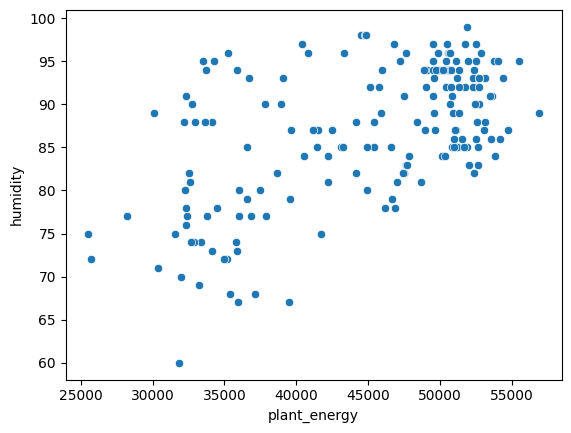

In [ ]:
### Show a graph on scatter plot on plant enery and humidity fro observing the correlation.

sns.scatterplot(data=df1_merge,x='plant_energy',y='humidity')

<Axes: xlabel='plant_energy', ylabel='temperature'>

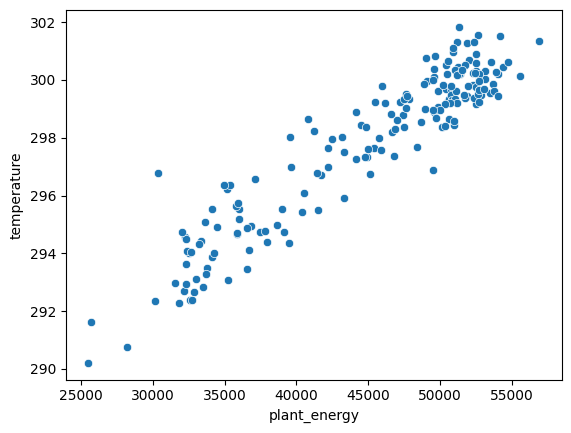

In [ ]:
### Show a graph on scatter plot on plant enery and temperatrue fro observing the correlation.
sns.scatterplot(data=df1_merge,x='plant_energy',y='temperature')

<Axes: xlabel='plant_energy', ylabel='Count'>

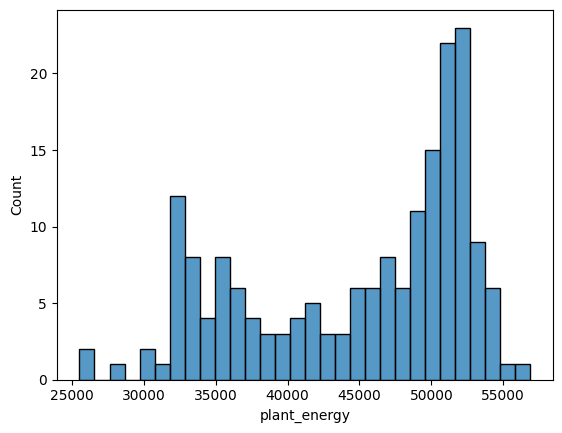

In [ ]:
### Show a graph on how the plant energy is distributed 

sns.histplot(data=df1_merge,x='plant_energy',bins=30)

<Axes: xlabel='temperature', ylabel='Count'>

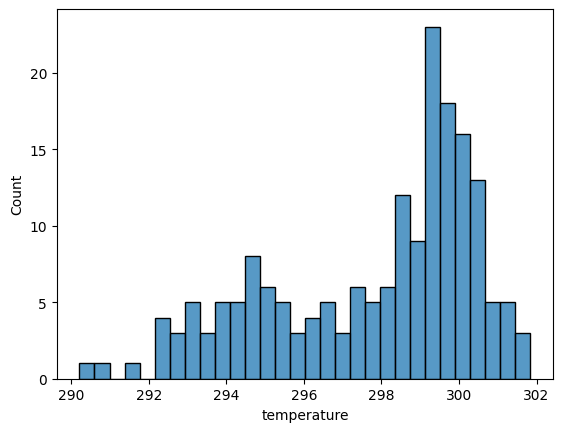

In [ ]:
### Show a graph on how the temperature distributed 

sns.histplot(data=df1_merge,x='temperature',bins=30)

<Axes: xlabel='humidity', ylabel='Count'>

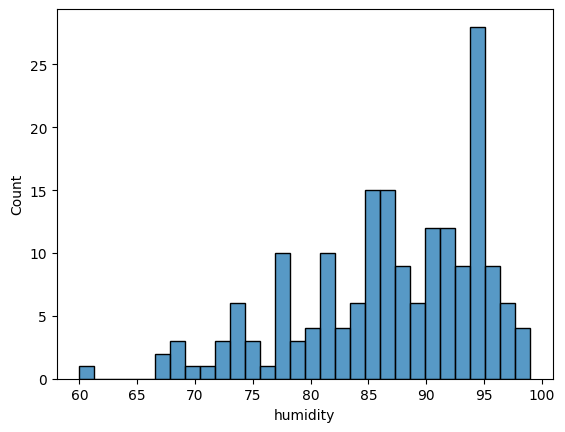

In [ ]:
### Show a graph on how the humidity distributed 

sns.histplot(data=df1_merge,x='humidity',bins=30)

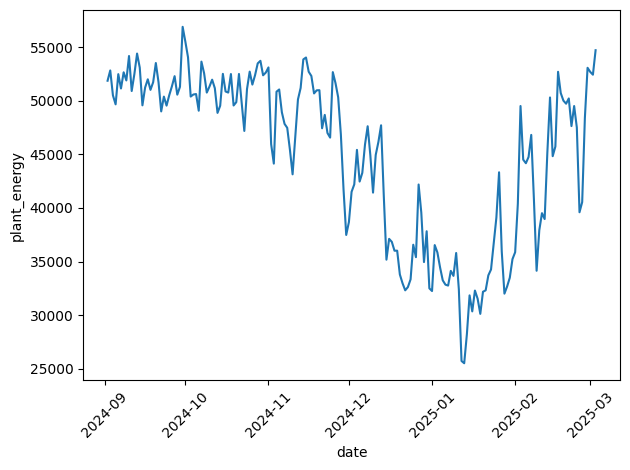

In [ ]:
### transform the date from object type to dattime65 tpye with ns unit
['date'] = df1_merge['date'].astype({'date': 'datetime64[ns]'})

### plot a line graph showing the trend of plant energy according to the date
sns.lineplot(data=df1_merge,x='date',y='plant_energy')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
### extract month from date and put as one of the features
df1_merge['month'] = pd.DatetimeIndex(df1_merge['date']).month

In [21]:
df1_merge

,date,plant_energy,humidity,temperature,month
0,2024-09-02,51857.0,99,299.45,9
1,2024-09-03,52817.5,96,299.49,9
2,2024-09-04,50493.5,92,300.22,9
3,2024-09-05,49655.5,87,300.82,9
4,2024-09-06,52470.0,86,300.89,9
...,...,...,...,...,...
178,2025-02-27,48390.0,88,297.67,2
179,2025-02-28,53064.0,87,299.70,2
180,2025-03-01,52680.0,90,299.95,3
181,2025-03-02,52420.0,90,300.23,3


<Axes: >

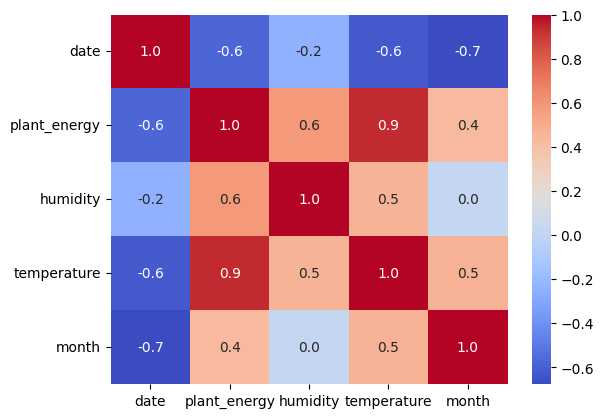

In [ ]:
### show the correlation heatmap for observing the correlation score
sns.heatmap(data=df1_merge.corr(),annot=True,fmt=".1f",cmap='coolwarm')

In [23]:
df2_merge

,date,plant_energy,humidity,temperature
0,2023-01-01,31124.0,77,294.13
1,2023-01-02,27481.0,77,294.49
2,2023-01-03,34559.0,69,297.52
3,2023-01-04,35418.0,68,298.03
4,2023-01-05,37479.0,83,296.57
...,...,...,...,...
725,2024-12-27,0.0,81,297.63
726,2024-12-28,0.0,79,298.01
727,2024-12-29,0.0,72,296.37
728,2024-12-30,0.0,90,294.78


In [24]:
df2_merge.describe()

,plant_energy,humidity,temperature
count,730.000000,730.000000,730.000000
mean,42678.153425,85.382192,300.027918
std,23440.755731,8.445936,2.117348
min,0.000000,45.000000,292.400000
25%,37179.000000,81.000000,299.170000
50%,53612.000000,86.000000,300.445000
75%,59113.000000,92.000000,301.460000
max,71375.000000,99.000000,304.310000


<Axes: xlabel='plant_energy', ylabel='humidity'>

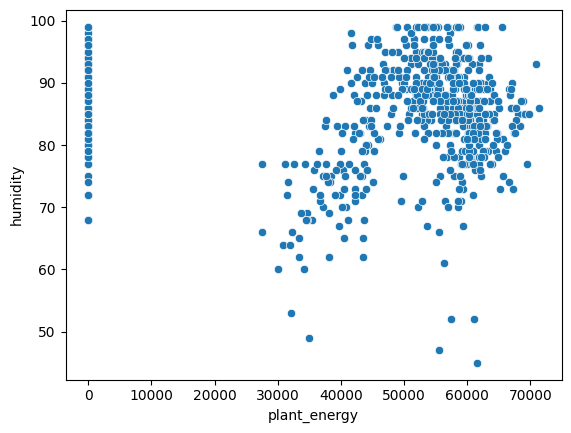

In [25]:
sns.scatterplot(data=df2_merge,x='plant_energy',y='humidity')

<Axes: xlabel='plant_energy', ylabel='temperature'>

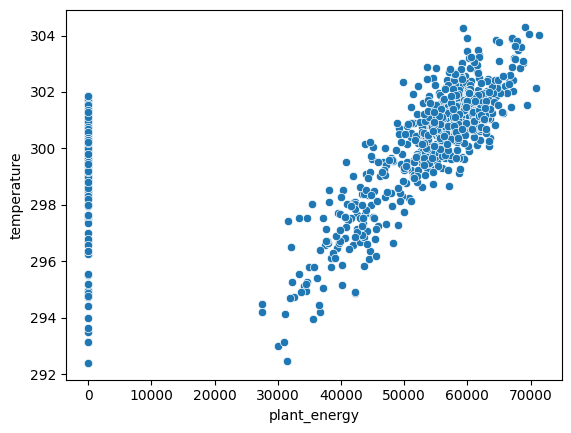

In [26]:
sns.scatterplot(data=df2_merge,x='plant_energy',y='temperature')

<Axes: xlabel='plant_energy', ylabel='Count'>

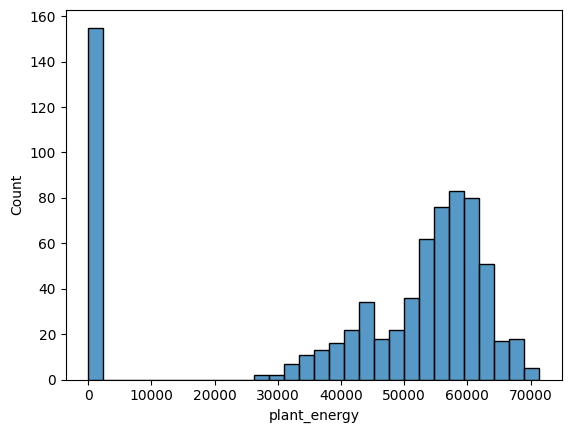

In [27]:
sns.histplot(data=df2_merge,x='plant_energy',bins=30)

In [ ]:
### clean data via dropping a 0 value
df2_clean = df2_merge.drop(df2_merge.loc[df2_merge['plant_energy']==0].index)


<Axes: xlabel='plant_energy', ylabel='Count'>

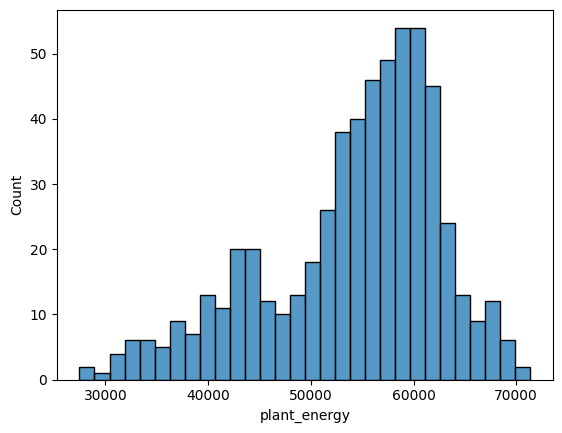

In [29]:
sns.histplot(data=df2_clean,x='plant_energy',bins=30)

<Axes: xlabel='temperature', ylabel='Count'>

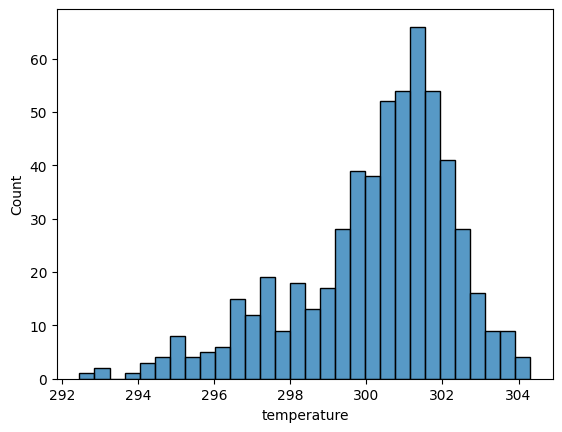

In [30]:
sns.histplot(data=df2_clean,x='temperature',bins=30)

<Axes: xlabel='humidity', ylabel='Count'>

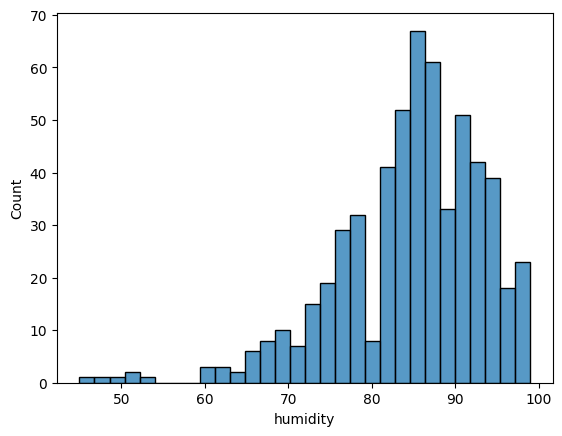

In [31]:
sns.histplot(data=df2_clean,x='humidity',bins=30)

<Axes: xlabel='plant_energy', ylabel='humidity'>

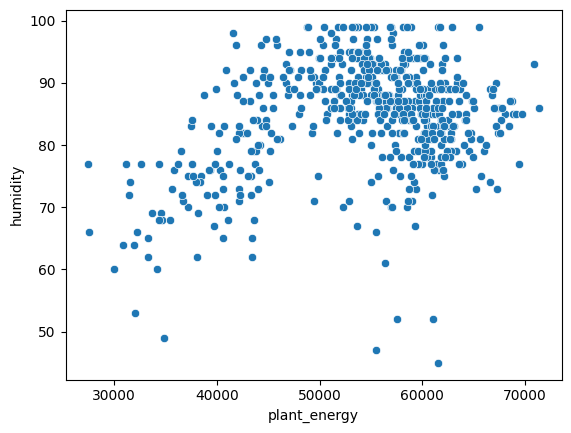

In [32]:
sns.scatterplot(data=df2_clean,x='plant_energy',y='humidity')

<Axes: xlabel='plant_energy', ylabel='temperature'>

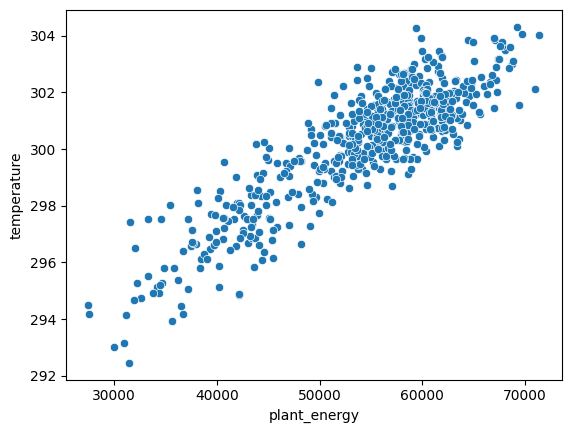

In [33]:
sns.scatterplot(data=df2_clean,x='plant_energy',y='temperature')

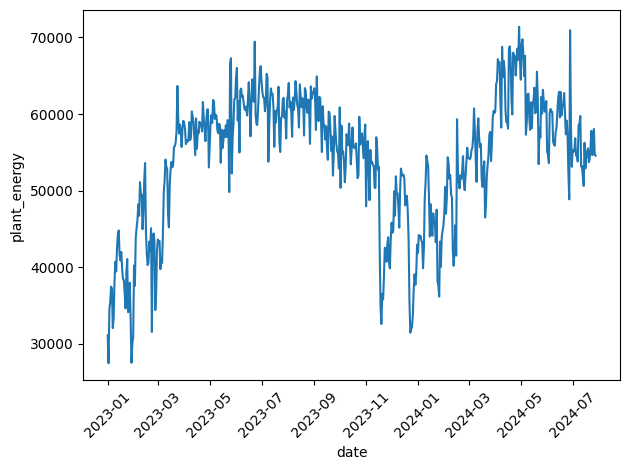

In [34]:
df2_clean['date'] = df2_clean['date'].astype({'date': 'datetime64[ns]'})
sns.lineplot(data=df2_clean,x='date',y='plant_energy')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df2_clean['month'] = pd.DatetimeIndex(df2_clean['date']).month

<Axes: >

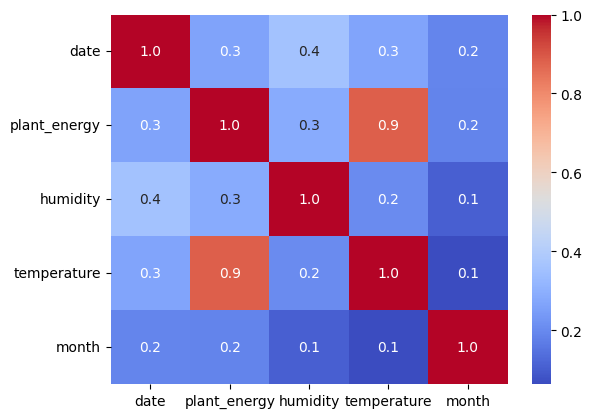

In [36]:
sns.heatmap(data=df2_clean.corr(),annot=True,fmt=".1f",cmap='coolwarm')

## Feature Selection

Based on the EDA, it can be clearly seen that temperature is the main feature of the plant energy. From the scatterplot graph, the plot shows that they are correlate in term of linear pattern where temperture is increasing, so the plant energy is increasing as well. Moreover, on the date, it show that there is some hidden patten which show that during some month the platn energy use less some use more. Finally, in humidity, even the correlation is not too high, but it can be used to control the weight along with other features.

In [ ]:
### select features and a target to predict
X = df2_clean.drop(['plant_energy','date'],axis=1)
y = np.log(df2_clean['plant_energy'])

In [ ]:
### split the train and test with test 10 percent (due to small amount of value)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [39]:
print(X_train.shape)
print(X_test.shape)


(517, 3)
(58, 3)


## Pre-Processing

In [ ]:
### from the skew distribution, MinMaxScaler was chosen to scale data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Selection

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

### declare model candidates
algor = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor()]

algor_name =['LinearRegression','RandomForestRegressor','DecisionTreeRegressor','GradientBoostingRegressor']

from sklearn.model_selection import KFold,cross_val_score

train_mse = []
test_mse = []

kfold = KFold(n_splits= 5, shuffle = True)
### perform the cross validation with a kfold techinque
for i,model in enumerate(algor):
    scores = cross_val_score(model,X_train,y_train,cv=kfold,scoring='neg_mean_squared_error')

    print(f"{algor_name[i]} = Score : {scores}; Mean: {scores.mean()}")


LinearRegression = Score : [-0.00503418 -0.00598692 -0.00491843 -0.00502166 -0.00562316]; Mean: -0.0053168698433800204
RandomForestRegressor = Score : [-0.00431642 -0.00570218 -0.00409056 -0.00371066 -0.00613209]; Mean: -0.004790382602094705
DecisionTreeRegressor = Score : [-0.00661039 -0.00741245 -0.00666598 -0.00715825 -0.00724235]; Mean: -0.007017883774187966
GradientBoostingRegressor = Score : [-0.0053502  -0.00308968 -0.00487206 -0.00467247 -0.00621428]; Mean: -0.004839737053191788


From the cross validation, the model that will be used is Gradient Boosting with low MSE on average. Moreover, choosing Gradient Boosting is because the model is the enhancement of the Random Forest where the Gradient Boosting will fixing the consider error from the previous graph to implement in the next graph criteria as well. 

In [ ]:
from sklearn.model_selection import GridSearchCV
### define some parameter for Graident Boosting
program_grid = {"learning_rate":[0.1,0.001,0.0005,0.00005],'max_depth':[5,10,None],'n_estimators':[5,6,7,8,9,10]}

gb = GradientBoostingRegressor(random_state=1)

### Perform GridSearch to find the best parameter fit
grid = GridSearchCV(estimator=gb,param_grid=program_grid,cv=kfold,n_jobs=-1,return_train_score=True,refit=True,scoring='neg_mean_squared_error')

grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.0005, 5e-05],
                         'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10]},
             return_train_score=True, scoring='neg_mean_squared_error')

## Evaluation

From the evaluation, R2 is 0.78, NMBE is 0.126, and CVRMSE is 0.00718. 
For R2 , the value is 0.78. The model perform pretty well compare to Mean model. 
For NMBE, the variance from the actual data doesn't far too much.
For CVMSE, the model seem to perform in quite the same as the actual data.

In [ ]:
y_pred = grid.predict(X_test)

## R2

In [44]:
from sklearn.metrics import r2_score,root_mean_squared_error

r2_score(y_pred=y_pred,y_true=y_test)

0.7814496142391374

## NMBE

In [108]:
np.sum(((y_test - y_pred)))/np.sum(y_test)*100

np.float64(0.12662797187398123)

## CVRMSE

In [46]:
root_mean_squared_error(y_pred=y_pred,y_true=y_test) / np.mean(y_pred)

np.float64(0.007187428780651548)

## Inference

In [47]:
sample = np.array([[77,294.13,5]])

np.exp(grid.predict(sample))

array([60933.25668547])

<BarContainer object of 3 artists>

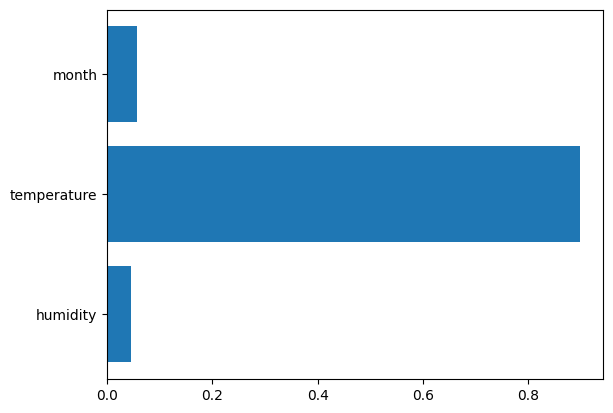

In [ ]:
### showing the feature importance which temperature affect most of the prediction.
plt.barh(X.columns,grid.best_estimator_.feature_importances_)

In [73]:
sample_after = df1_merge[['humidity','temperature','month']].iloc[100]


result = df1_merge[['plant_energy']].iloc[3]

sampel_value =  scaler.transform(np.array([sample_after]))

predicted = np.exp(grid.predict(sampel_value))

print(predicted)

saving =  predicted - result.values

[47457.20241601]


/Users/standalonemac/.pyenv/versions/3.11.11/envs/eng_3_11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


## Export Data

In [ ]:
### Export data embedded with predicted data and saving cost
predicted_results = []
df1_predit = df1_merge.copy()
df1_predit.drop(['date','plant_energy'],axis=1,inplace=True)
for i in df1_predit.values:
    print(i)
    sample_after = scaler.transform(np.array([i]))
    predicted = np.exp(grid.predict(sample_after))
    predicted_results.append(predicted)


[ 99.   299.45   9.  ]
[ 96.   299.49   9.  ]
[ 92.   300.22   9.  ]
[ 87.   300.82   9.  ]
[ 86.   300.89   9.  ]
[ 87.   301.31   9.  ]
[ 83.   301.56   9.  ]
[ 85.   301.28   9.  ]
[ 86.   301.52   9.  ]
[ 89.   300.97   9.  ]
[ 92.  300.3   9. ]
[ 93.   300.44   9.  ]
[ 93.   300.04   9.  ]
[ 89.  300.1   9. ]
[ 85.   300.46   9.  ]
[ 83.  300.7   9. ]
[ 87.   300.35   9.  ]
[ 97.   299.39   9.  ]
[ 86.   300.63   9.  ]
[ 92.  300.5   9. ]
[ 92.   300.77   9.  ]
[ 92.   300.51   9.  ]
[ 95.   300.37   9.  ]
[ 97.   299.28   9.  ]
[ 94.   300.19   9.  ]
[ 93.   299.83   9.  ]
[ 94.   300.67   9.  ]
[ 89.   301.84   9.  ]
[ 89.   301.35   9.  ]
[ 95.   300.14  10.  ]
[ 95.  300.2  10. ]
[ 95.   299.68  10.  ]
[ 96.   298.66  10.  ]
[ 96.   299.34  10.  ]
[ 94.   299.96  10.  ]
[ 91.   299.85  10.  ]
[ 88.   300.21  10.  ]
[ 92.   299.68  10.  ]
[ 92.   300.22  10.  ]
[ 95.   299.79  10.  ]
[ 93.   300.16  10.  ]
[ 94.   299.86  10.  ]
[ 94.   300.01  10.  ]
[ 95.   300.58  10.  ]
[ 9

/Users/standalonemac/.pyenv/versions/3.11.11/envs/eng_3_11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/standalonemac/.pyenv/versions/3.11.11/envs/eng_3_11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/standalonemac/.pyenv/versions/3.11.11/envs/eng_3_11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/standalonemac/.pyenv/versions/3.11.11/envs/eng_3_11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/Users/standalonemac/.pyenv/versions/3.11.11/envs/eng_3_

In [100]:
df1_new = df1_merge.copy()
df1_new_merge =  pd.concat([df1_new,pd.DataFrame(predicted_results,columns=['predicted_plant_energy'])],axis=1)

In [101]:
df_saving = pd.DataFrame(((pd.Series(predicted_results) - df1_new_merge['plant_energy'])/pd.Series(predicted_results)[0])*100,columns=['saving'])

In [ ]:
df1_new_merge =  pd.concat([df1_new_merge,df_saving],axis=1)

In [103]:
df1_new_merge.to_csv('predicted_after_ai.csv', index=False)  